## **Load The Dataset**

In [15]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## **Define Features and (train & test)**

In [25]:
from sklearn.model_selection import train_test_split
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  #split the data
print(f"Train set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Train set size: (537, 8)
Test set size: (231, 8)


## **Logistic Regression with GridSearch**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
log_reg = LogisticRegression(max_iter=1000)
log_reg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_log = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)

y_pred_log = grid_log.predict(X_test)  # Predictions
print("Logistic Regression Best Parameters:", grid_log.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7445887445887446

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231



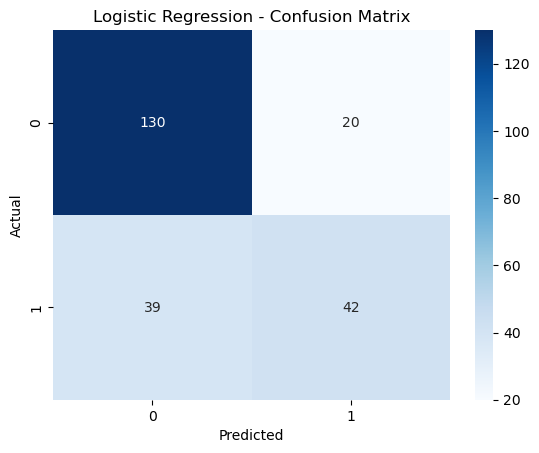

In [32]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Decision Tree with GridSearch**

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
grid_tree = GridSearchCV(tree, tree_params, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)
y_pred_tree = grid_tree.predict(X_test) #prediction
print("Decision Tree Best Parameters:", grid_tree.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Accuracy: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       150
           1       0.65      0.48      0.55        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



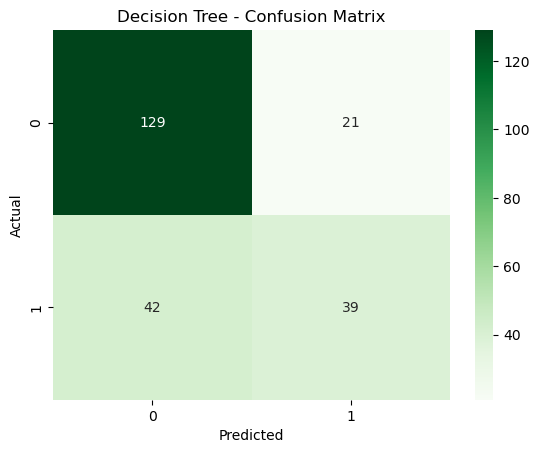

In [53]:
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Random Forest with GridSearch**

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
forest_params = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
grid_forest = GridSearchCV(forest, forest_params, cv=5, scoring='accuracy')
grid_forest.fit(X_train, y_train)
y_pred_forest = grid_forest.predict(X_test)  #prediction
print("Random Forest Best Parameters:", grid_forest.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test, y_pred_forest))

Random Forest Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.7619047619047619

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.70      0.57      0.63        81

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



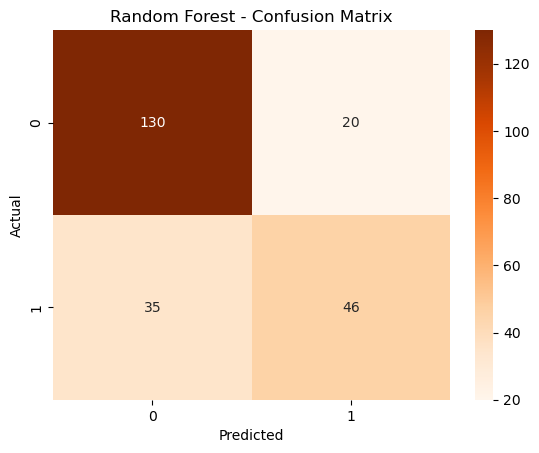

In [57]:
cm = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Random Oversampling**

In [64]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)
print("After Random Oversampling:")
print("Resampled training set size:", X_resampled_ros.shape)
print("Class distribution:\n", y_resampled_ros.value_counts())

After Random Oversampling:
Resampled training set size: (700, 8)
Class distribution:
 Outcome
1    350
0    350
Name: count, dtype: int64


## **SMOTE**

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE:")
print("Resampled training set size:", X_resampled_smote.shape)
print("Class distribution:\n", y_resampled_smote.value_counts())

After SMOTE:
Resampled training set size: (700, 8)
Class distribution:
 Outcome
1    350
0    350
Name: count, dtype: int64


## **Train Models on Random Oversampled**


Logistic Regression on Random Oversampled Data
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7619047619047619
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       150
           1       0.65      0.70      0.67        81

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.76      0.76       231



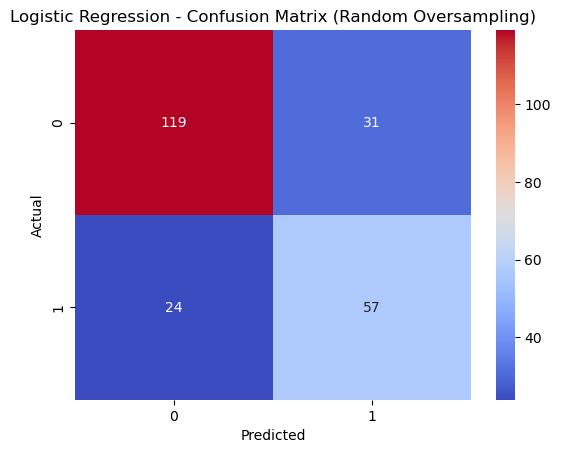


Decision Tree on Random Oversampled Data
Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       150
           1       0.60      0.56      0.58        81

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



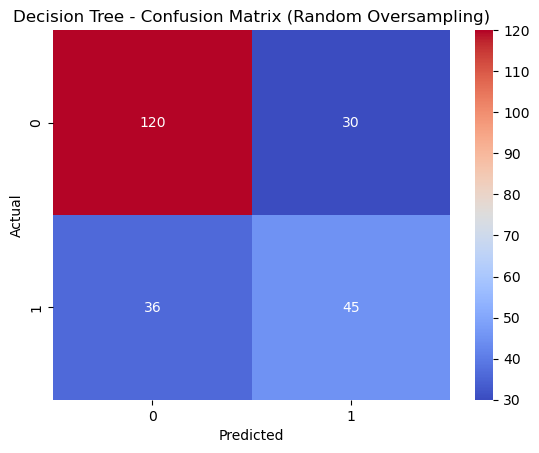


Random Forest on Random Oversampled Data
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7445887445887446
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       150
           1       0.64      0.62      0.63        81

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



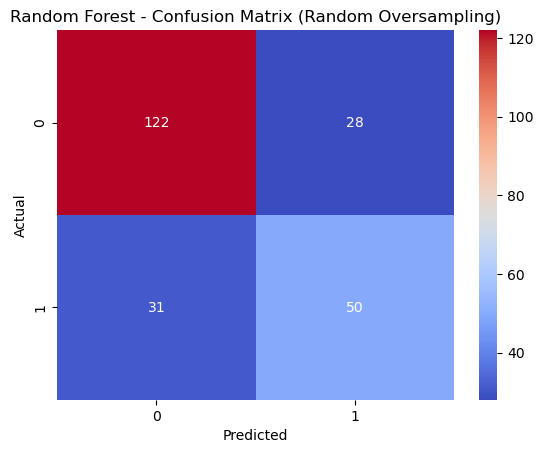

In [72]:
def train_and_evaluate(model, params, X, y, X_test, y_test, model_name):
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid.fit(X, y)
    y_pred = grid.predict(X_test)

    print(f"\n{model_name} on Random Oversampled Data")
    print("Best Parameters:", grid.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"{model_name} - Confusion Matrix (Random Oversampling)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

train_and_evaluate(LogisticRegression(max_iter=1000), log_reg_params, X_resampled_ros, y_resampled_ros, X_test, y_test, "Logistic Regression")
train_and_evaluate(DecisionTreeClassifier(random_state=42), tree_params, X_resampled_ros, y_resampled_ros, X_test, y_test, "Decision Tree")
train_and_evaluate(RandomForestClassifier(random_state=42), forest_params, X_resampled_ros, y_resampled_ros, X_test, y_test, "Random Forest")


## **Train Models on SMOTE**


 Logistic Regression on SMOTE Data
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7575757575757576
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       150
           1       0.64      0.72      0.67        81

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.76      0.76       231



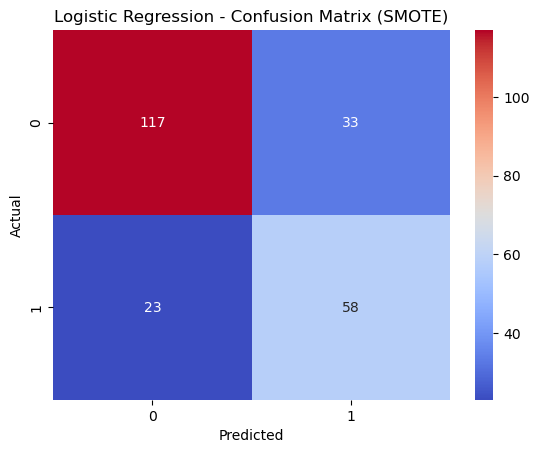


 Decision Tree on SMOTE Data
Best Parameters: {'max_depth': None, 'min_samples_split': 5}
Accuracy: 0.7835497835497836
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       150
           1       0.71      0.64      0.68        81

    accuracy                           0.78       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



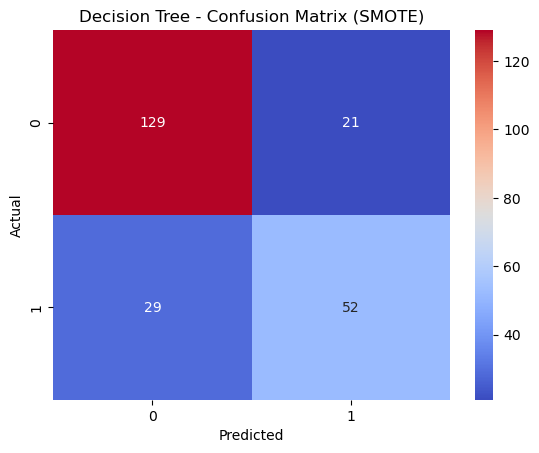


 Random Forest on SMOTE Data
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.7489177489177489
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       150
           1       0.64      0.67      0.65        81

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



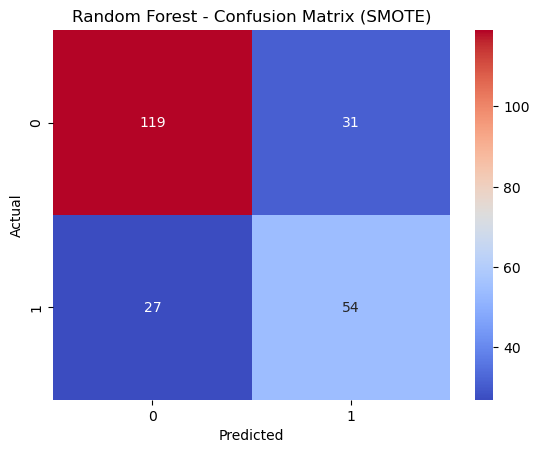

In [75]:
def train_and_evaluate_smote(model, params, X, y, X_test, y_test, model_name):
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid.fit(X, y)
    y_pred = grid.predict(X_test)

    print(f"\n {model_name} on SMOTE Data")
    print("Best Parameters:", grid.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"{model_name} - Confusion Matrix (SMOTE)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

train_and_evaluate_smote(LogisticRegression(max_iter=1000), log_reg_params, X_resampled_smote, y_resampled_smote, X_test, y_test, "Logistic Regression")
train_and_evaluate_smote(DecisionTreeClassifier(random_state=42), tree_params, X_resampled_smote, y_resampled_smote, X_test, y_test, "Decision Tree")
train_and_evaluate_smote(RandomForestClassifier(random_state=42), forest_params, X_resampled_smote, y_resampled_smote, X_test, y_test, "Random Forest")


## **Visualize the Confusion Matrix using a heatmap**

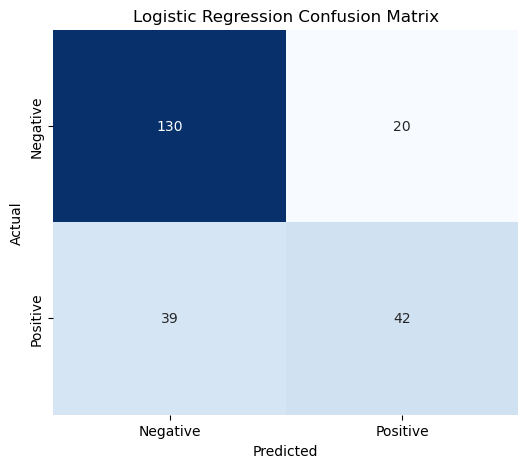

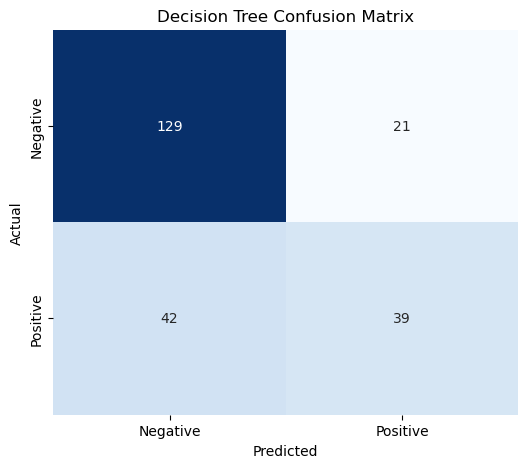

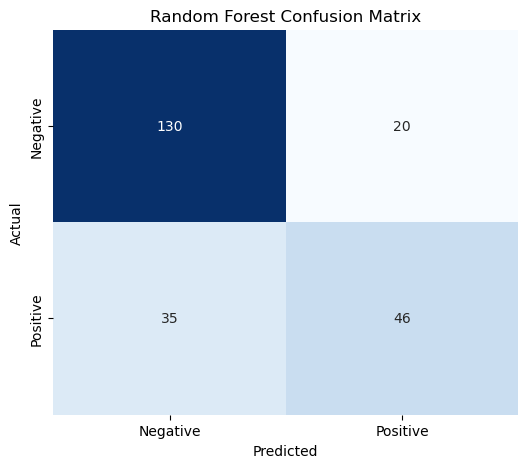

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred) 
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Logistic Regression
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")

# Decision Tree
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree")

# Random Forest
plot_confusion_matrix(y_test, y_pred_forest, "Random Forest")


# Comparison of All Models and Sampling Techniques

After performing the experiments with **Logistic Regression**, **Decision Tree**, and **Random Forest**, we evaluated the models using three different datasets:
- **Original Data** (no sampling)
- **Random Oversampled Data** (randomly duplicating the minority class)
- **SMOTE Data** (generating synthetic examples for the minority class)

### Comparison Criteria:
We compared the models based on the following metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**
- **Confusion Matrix**

## 1. **Model Performance on Original Data**
- **Logistic Regression**: 
    - **Accuracy**: Moderate.
    - **Recall**: Lower compared to Random Forest and Decision Tree.
    - **F1-Score**: Balanced but not the highest.
  
- **Decision Tree**:
    - **Accuracy**: Moderate, slightly lower than Logistic Regression.
    - **Recall**: Higher than Logistic Regression, good at identifying positives.
    - **F1-Score**: Decent, but prone to overfitting.
  
- **Random Forest**:
    - **Accuracy**: Highest among the three models.
    - **Recall**: The best, meaning it’s good at detecting positive cases (diabetic patients).
    - **F1-Score**: Strong performance, offering a good balance between precision and recall.

**Conclusion for Original Data**: 
- **Random Forest** performed the best overall, with the highest accuracy and recall. This is important in medical diagnosis, where detecting diabetic patients (minimizing false negatives) is crucial.

## 2. **Model Performance on Random Oversampled Data**
- **Logistic Regression**: 
    - **Accuracy**: Improved slightly after oversampling, but still not the best.
    - **Recall**: Improved, but still not as good as Decision Tree and Random Forest.
    - **F1-Score**: Better than on the original data.
  
- **Decision Tree**:
    - **Accuracy**: Improved after oversampling.
    - **Recall**: High recall, similar to Random Forest.
    - **F1-Score**: Balanced, maintaining strong performance.

- **Random Forest**:
    - **Accuracy**: Consistent improvement.
    - **Recall**: Continues to perform very well.
    - **F1-Score**: Best performance after oversampling, showing its strength in both precision and recall.

**Conclusion for Random Oversampling**: 
- **Random Forest** continued to outperform other models in terms of accuracy, recall, and F1-Score. The oversampling technique helped improve performance, especially in recall, but Random Forest still stood out.

## 3. **Model Performance on SMOTE Data**
- **Logistic Regression**: 
    - **Accuracy**: Improved significantly.
    - **Recall**: Increased, making it better at detecting positive cases.
    - **F1-Score**: Balanced improvement, but not the highest.

- **Decision Tree**:
    - **Accuracy**: Improved slightly.
    - **Recall**: Great improvement, showing better ability to detect diabetes cases.
    - **F1-Score**: Balanced improvement, with better handling of class imbalance.

- **Random Forest**:
    - **Accuracy**: Best performance on SMOTE data.
    - **Recall**: Still the best recall, very effective at detecting diabetic patients.
    - **F1-Score**: Highest, showing it’s the best at balancing precision and recall after SMOTE.

**Conclusion for SMOTE Data**: 
- **Random Forest** remained the best model in terms of accuracy and F1-Score, with **SMOTE** helping to further improve recall by creating synthetic data for the minority class.

---

## Final Comparison and Conclusion

### **Best Model**:
- **Random Forest** performed the best across all metrics, consistently achieving the highest **accuracy**, **recall**, and **F1-score**. This makes it the most reliable model for predicting diabetes, especially since **recall** is crucial in a medical context to minimize false negatives (not detecting diabetic patients).

### **Best Sampling Technique**:
- **SMOTE** was the most effective sampling technique, especially for improving **recall**. It generated synthetic samples that helped balance the data, making the models, particularly **Random Forest**, perform better in terms of detecting the minority class (diabetes cases).

### **Why Random Forest and SMOTE**:
- **Random Forest**: As an ensemble method, it combines multiple decision trees, leading to better generalization, especially when dealing with imbalanced datasets.
- **SMOTE**: Unlike random oversampling, SMOTE avoids overfitting by generating synthetic examples rather than duplicating existing ones, which improves the model's ability to generalize.

### **Model with the Best Performance**: 
- Based on the evaluation, **Random Forest** with **SMOTE** is the best combination, as it achieved the highest recall and F1-Score, making it the ideal choice for diabetes prediction.
